In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to convert large values to numeric:
def convert(s):
    multiplier = 1
    if s[-1] in 'Kk':
        multiplier = 1000
        s = s[:-1]
    elif s[-1] in 'Mm':
        multiplier = 1000000
        s = s[:-1]
    elif s[-1] in 'Bb':
        multiplier = 1000000000
        s = s[:-1]

    return int(float(s) * multiplier)
    
convert('5B')    

5000000000

In [3]:
# Assigning file paths 
filepath_gni = "../data/gni_per_cap_atlas_method_con2021.csv"
filepath_hdi = '../data/hdi_human_development_index.csv'
filepath_le = '../data/life_expectancy.csv'

# Importing datasets to dataframes
gni = pd.read_csv(filepath_gni)
hdi = pd.read_csv(filepath_hdi)
le = pd.read_csv(filepath_le)

In [4]:
# Printing first 5 records of GNI
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [5]:
# Printing first 5 records of HDI
hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
2,Albania,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
4,UAE,0.728,0.739,0.742,0.748,0.755,0.762,0.767,0.773,0.779,...,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912,0.911


In [6]:
# Changing UAE to Uniter Arab Emirates to enable later merging
hdi.loc[hdi['country']=='UAE', 'country'] = 'United Arab Emirates'

In [7]:
# Printing first 5 records of LE
le.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [8]:
gni.shape, le.shape, hdi.shape

((191, 252), (195, 302), (191, 33))

In [9]:
# Checking total number of countries present in each dataset
len(gni['country']), len(hdi['country']), len(le['country'])

(191, 191, 195)

In [10]:
# Checking for missing values in GNI
gni.isna().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [11]:
# Checking for missing values in HDI
hdi.isna().sum()

country     0
1990       50
1991       50
1992       50
1993       50
1994       50
1995       39
1996       39
1997       39
1998       39
1999       34
2000       17
2001       17
2002       14
2003       12
2004       10
2005        5
2006        5
2007        4
2008        4
2009        4
2010        2
2011        1
2012        1
2013        1
2014        1
2015        1
2016        1
2017        1
2018        0
2019        0
2020        0
2021        0
dtype: int64

In [12]:
# Checking for missing values in LE
le.isna().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [13]:
# The datasets all should contain 1 object column (for country names) and remaining columns should be integers

In [14]:
# Checking number of object types in GNI
gni.select_dtypes('object').columns

Index(['country', '1897', '1898', '1899', '1900', '1901', '1902', '1903',
       '1904', '1905',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=155)

In [15]:
# Checking number of object types in HDI
hdi.select_dtypes('object').columns

Index(['country'], dtype='object')

In [16]:
# Checking number of object types in LE
le.select_dtypes('object').columns

Index(['country'], dtype='object')

In [17]:
# Converting object columns to float
obj_cols = [i for i in gni.columns if (gni[i].dtype == 'object') & (i != 'country')]
gni[obj_cols] = gni[obj_cols].applymap(lambda x: convert(x) if isinstance(x, str) else x)

In [18]:
gni[obj_cols].dtypes

1897    float64
1898    float64
1899    float64
1900    float64
1901    float64
         ...   
2046    float64
2047    float64
2048    float64
2049    float64
2050    float64
Length: 154, dtype: object

In [19]:
gni.isna().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [20]:
# Checking number of object types in HDI
hdi.select_dtypes('object').columns

Index(['country'], dtype='object')

In [21]:
# Checking number of object types in LE
le.select_dtypes('object').columns

Index(['country'], dtype='object')

In [22]:
# Since the number of object columns in LE and HDI is 1, all other columns are either float or int

In [23]:
# Checking last column for each dataset
gni[gni.columns[-1]], hdi[hdi.columns[-1]], le[le.columns[-1]]


(0        907.0
 1       3340.0
 2      11600.0
 3      57900.0
 4      15500.0
         ...   
 186     6440.0
 187     1730.0
 188     9220.0
 189     1520.0
 190     1880.0
 Name: 2050, Length: 191, dtype: float64,
 0      0.478
 1      0.586
 2      0.796
 3      0.858
 4      0.911
        ...  
 186    0.707
 187    0.455
 188    0.713
 189    0.565
 190    0.593
 Name: 2021, Length: 191, dtype: float64,
 0      76.8
 1      80.0
 2      88.4
 3       NaN
 4      83.3
        ... 
 190    80.8
 191    78.0
 192    77.7
 193    77.1
 194    74.4
 Name: 2100, Length: 195, dtype: float64)

In [24]:
# Checking first column after country for each dataset
gni[gni.columns[1]], hdi[hdi.columns[1]], le[le.columns[1]]

(0      207.0
 1      517.0
 2      207.0
 3      738.0
 4      794.0
        ...  
 186    373.0
 187    197.0
 188    800.0
 189    213.0
 190    443.0
 Name: 1800, Length: 191, dtype: float64,
 0      0.273
 1        NaN
 2      0.647
 3        NaN
 4      0.728
        ...  
 186      NaN
 187    0.383
 188    0.632
 189    0.412
 190    0.509
 Name: 1990, Length: 191, dtype: float64,
 0      28.2
 1      27.0
 2      35.4
 3       NaN
 4      30.7
        ... 
 190    25.4
 191    23.4
 192    33.5
 193    32.6
 194    33.7
 Name: 1800, Length: 195, dtype: float64)

In [25]:
# Since HDI columns only go upto 2021, all other datasets will be shortened for this analysis. The analysis also starts from 1990 since that is ubiquitously available
gni_country = gni['country']
hdi_country = hdi['country']
le_country = le['country']

gni =  gni.loc[:, '1990':'2021']
le = le.loc[:, '1990':'2021']
hdi = hdi.loc[:, '1990':'2021']

gni['country'] = gni_country
hdi['country'] = hdi_country
le['country'] = le_country


In [26]:
# appending the dataset name to each column to ease with merging

gni = gni.rename(columns=lambda x: x + '_gni' if x != 'country' else x)
hdi = hdi.rename(columns=lambda x: x + '_hdi' if x != 'country' else x)
le = le.rename(columns=lambda x: x + '_le' if x != 'country' else x)

In [27]:
merged = le.merge(hdi.merge(gni, on='country', how='outer'), on='country', how='outer')

In [28]:
# Not dropping missing rows of data right now as relevant information gets lost. 
# merged.dropna(inplace=True)

In [29]:
merged.to_csv('../data/merged.csv', index=False)

In [30]:
#Code:

# For dataset level summary statistics, 

gni_columns = [i for i in merged.columns if 'gni' in i or i == 'country']
hdi_columns = [i for i in merged.columns if 'hdi' in i or i == 'country']
le_columns = [i for i in merged.columns if 'le' in i or i == 'country']

In [31]:
# Top 5 Years with highest average Gross National Income
merged[gni_columns].describe().T.sort_values(by='mean', ascending=False)['mean'].head(5)

2013_gni    15188.442105
2014_gni    15051.478947
2008_gni    15050.157068
2012_gni    14724.657895
2009_gni    14648.586387
Name: mean, dtype: float64

In [32]:
# Top 5 Years with highest median Gross National Income
merged[gni_columns].describe().T.sort_values(by='50%', ascending=False)['50%'].head(5)

2014_gni    6375.0
2013_gni    6320.0
2015_gni    6060.0
2012_gni    6055.0
2019_gni    5820.0
Name: 50%, dtype: float64

There may be some right skew in the gni data as the mean is higher than the median but further investigation is required

In [33]:
# Top 5 Years with highest average HDI
merged[hdi_columns].describe().T.sort_values(by='mean', ascending=False)['mean'].head(5)

2019_hdi    0.727497
2018_hdi    0.723927
2020_hdi    0.721524
2021_hdi    0.720576
2017_hdi    0.719547
Name: mean, dtype: float64

In [34]:
# Top 5 Years with highest median HDI
merged[hdi_columns].describe().T.sort_values(by='50%', ascending=False)['50%'].head(5)

2019_hdi    0.7460
2018_hdi    0.7460
2017_hdi    0.7440
2016_hdi    0.7415
2021_hdi    0.7390
Name: 50%, dtype: float64

Interestingly, the median of HDI is slightly higher than the mean for all years. Could there be a left skew?

In [35]:
# Top 5 Years with highest average LE
merged[le_columns].describe().T.sort_values(by='mean', ascending=False)['mean'].head(5)

2021_le    73.270968
2019_le    72.857949
2018_le    72.632821
2020_le    72.446237
2017_le    72.394359
Name: mean, dtype: float64

In [36]:
# Top 5 Years with highest median LE
merged[le_columns].describe().T.sort_values(by='50%', ascending=False)['50%'].head(5)

2021_le    74.15
2019_le    73.70
2018_le    73.50
2017_le    73.40
2020_le    73.20
Name: 50%, dtype: float64

Similar to HDI, there is a slight increase in median values when compared to mean values for all years.

In [37]:
# Resetting indices to start from 0
merged.reset_index(drop=True, inplace=True)

In [38]:
# Transposing dataset if different analysis is required
t_merged = merged.T
t_merged.columns = merged.T[merged.T.index == 'country'].values[0]
t_merged.drop(index='country', inplace=True)
t_merged.head()

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe,UK,Liechtenstein,USA
1990_le,53.8,49.7,72.8,79.0,68.7,72.5,70.6,74.0,77.0,76.0,...,69.2,63.1,66.9,59.1,64.2,51.9,62.4,NaN,NaN,NaN
1991_le,53.8,50.3,72.6,79.1,68.7,72.7,70.3,74.0,77.4,76.1,...,69.5,63.2,66.9,59.5,64.3,50.7,61.4,NaN,NaN,NaN
1992_le,54.2,50.3,73.2,79.2,68.8,72.8,69.4,74.0,77.6,76.3,...,69.8,63.1,67.2,59.9,63.6,49.6,59.8,NaN,NaN,NaN
1993_le,54.4,49.0,73.8,79.3,68.8,73.0,69.0,73.4,77.9,76.5,...,70.2,63.1,67.4,60.3,64.3,48.7,58.0,NaN,NaN,NaN
1994_le,53.9,50.3,74.6,79.5,68.7,73.4,69.5,73.3,78.0,76.7,...,70.5,63.2,67.5,60.5,63.4,47.7,56.2,NaN,NaN,NaN


In [39]:
# Top 5 Country wise average Gross National Income
t_merged.loc[t_merged.index.str.contains('gni'), ].mean().sort_values(ascending=False).head()

Liechtenstein    112365.00000
Switzerland       81087.50000
Luxembourg        79878.12500
Norway            77071.87500
Denmark           59237.46875
dtype: float64

In [40]:
# Bottom 5 Country wise average Gross National Income
t_merged.loc[t_merged.index.str.contains('gni'), ].mean().sort_values().head()

Burundi             250.62500
Somalia             346.53125
Congo, Dem. Rep.    353.65625
Malawi              388.68750
Liberia             409.09375
dtype: float64

Huge discrepency in GNI between highest and lowest

In [41]:
# Top 5 Country wise average HDI
t_merged.loc[t_merged.index.str.contains('hdi'), ].mean().sort_values(ascending=False).head()

Norway           0.918812
Liechtenstein    0.913955
Switzerland      0.911188
Australia        0.909406
Germany          0.904687
dtype: float64

In [42]:
# Bottom 5 Country wise average HDI
t_merged.loc[t_merged.index.str.contains('hdi'), ].mean().sort_values().head()

Niger                       0.306781
Mozambique                  0.352281
Mali                        0.353812
Burundi                     0.354656
Central African Republic    0.354719
dtype: float64

The lowest HDI is a third of the highest HDI

In [43]:
# Top 5 Country wise average LE
t_merged.loc[t_merged.index.str.contains('le'), ].mean().sort_values(ascending=False).head()

Japan               82.468750
Hong Kong, China    81.537500
Switzerland         81.478125
San Marino          81.420000
Iceland             81.415625
dtype: float64

In [44]:
# Bottom 5 Country wise average LE
t_merged.loc[t_merged.index.str.contains('le'), ].mean().sort_values().head()

Central African Republic    47.062500
Lesotho                     50.709375
Eswatini                    52.818750
Zambia                      53.062500
Burundi                     53.309375
dtype: float64

A difference of an average of 35 years in LE is present between the highest and lowest

In [45]:
# Highest to lowest differences in LE 
(t_merged.loc[t_merged.index.str.contains('le')].dropna(axis=1).max() - t_merged.loc[t_merged.index.str.contains('le')].dropna(axis=1).min()).sort_values(ascending=False)

Rwanda                59.7
Haiti                 31.9
Ethiopia              22.7
Burundi               21.5
Malawi                20.1
                      ... 
Fiji                   2.8
Barbados               2.7
Montenegro             2.5
Dominican Republic     1.9
Paraguay               1.7
Length: 186, dtype: object

The biggest difference in LE by country. Since the most recent LE at 2021 may not necessarily be the highest LE, this metric shows the highest possible difference that a country has achieved with respect to LE

In [46]:
# Highest to lowest differences in HDI 
(t_merged.loc[t_merged.index.str.contains('hdi')].dropna(axis=1).max() - t_merged.loc[t_merged.index.str.contains('hdi')].dropna(axis=1).min()).sort_values(ascending=False)

China         0.284
Bangladesh    0.267
Myanmar       0.267
Turkey        0.242
Morocco       0.236
              ...  
Barbados      0.074
Brunei        0.068
Jamaica        0.06
USA           0.058
St. Lucia     0.056
Length: 141, dtype: object

The biggest difference in HDI by country. Since the most recent HDI at 2021 may not necessarily be the highest HDI, this metric shows the highest possible difference that a country has achieved with respect to HDI

In [47]:
# Highest to lowest differences in GNI 
(t_merged.loc[t_merged.index.str.contains('gni')].dropna(axis=1).max() - t_merged.loc[t_merged.index.str.contains('gni')].dropna(axis=1).min()).sort_values(ascending=False)

Norway              69100.0
Qatar               62200.0
Kuwait              52900.0
Luxembourg          49400.0
Iceland             48700.0
                     ...   
Congo, Dem. Rep.      382.0
Malawi                374.0
Somalia               274.0
Burundi               241.0
Madagascar            175.0
Length: 190, dtype: object

The biggest difference in GNI by country. Since the most recent GNI at 2021 may not necessarily be the highest GNI, this metric shows the highest possible difference that a country has achieved with respect to GNI

In [48]:
# Code

# Making the country column the index of the dataset for easier analysis
n_merged = merged.set_index('country')

# Removing the country from each of these lists so they only reference float columns
for i in [gni_columns, le_columns, hdi_columns]:
    i.remove('country')

In [49]:
# How does the average Life expectancy and Gross National Income correlate with average Human Developement Index?

# Creating a new datafram to analyze averages of hdi, le and gni grouped by countries
avg_per_country = pd.DataFrame()
avg_per_country['country'] = n_merged.dropna().index

# Dropping records that have missing values
avg_per_country.loc[:, "gni"] = n_merged.dropna()[gni_columns].mean(axis=1).values
avg_per_country['hdi'] = n_merged.dropna()[hdi_columns].mean(axis=1).values
avg_per_country['le'] = n_merged.dropna()[le_columns].mean(axis=1).values

avg_per_country.set_index('country', inplace=True)

In [50]:
# Creating correlation matrix
avg_cor = avg_per_country.corr()

<Axes: title={'center': 'Correlation Matrix of Average Life Expectancy, Gross National Income and Human Development Index'}>

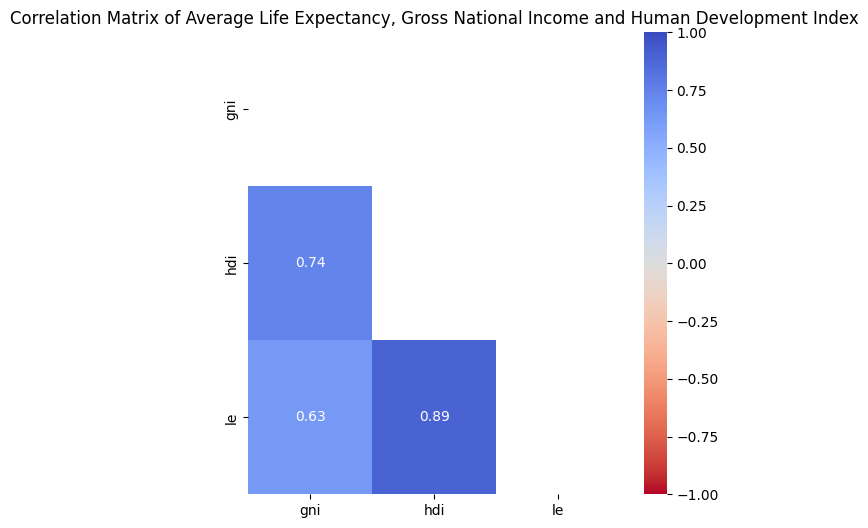

In [51]:
# Plotting cor matrix
plt.figure(figsize=(6,6))
plt.title("Correlation Matrix of Average Life Expectancy, Gross National Income and Human Development Index")
mask = np.triu(np.ones_like(avg_cor, dtype=bool))
sns.heatmap(avg_cor, mask=mask, annot=True, fmt='.2f', cmap='coolwarm_r', vmin=-1, vmax=1)


There seems to be a strong positive correlation between HDI and GNI, and between HDI and LE.

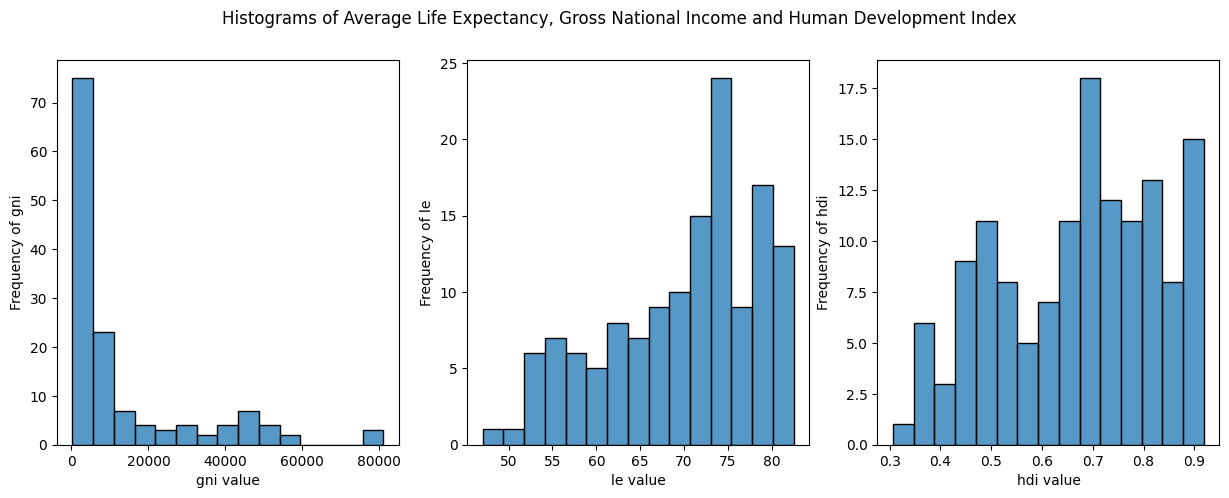

In [52]:
# Histograms
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Histograms of Average Life Expectancy, Gross National Income and Human Development Index")
for plot, column in zip(ax, ['gni','le','hdi']):
    sns.histplot(data=avg_per_country, x=column, ax=plot, bins=15)
    plot.set_xlabel(f"{column} value")
    plot.set_ylabel(f"Frequency of {column}")
plt.show()

Most countries have an average GNI value <20000. Also the GNI data seems to be right-skewed.

Distributions of LE and HDI are similar.

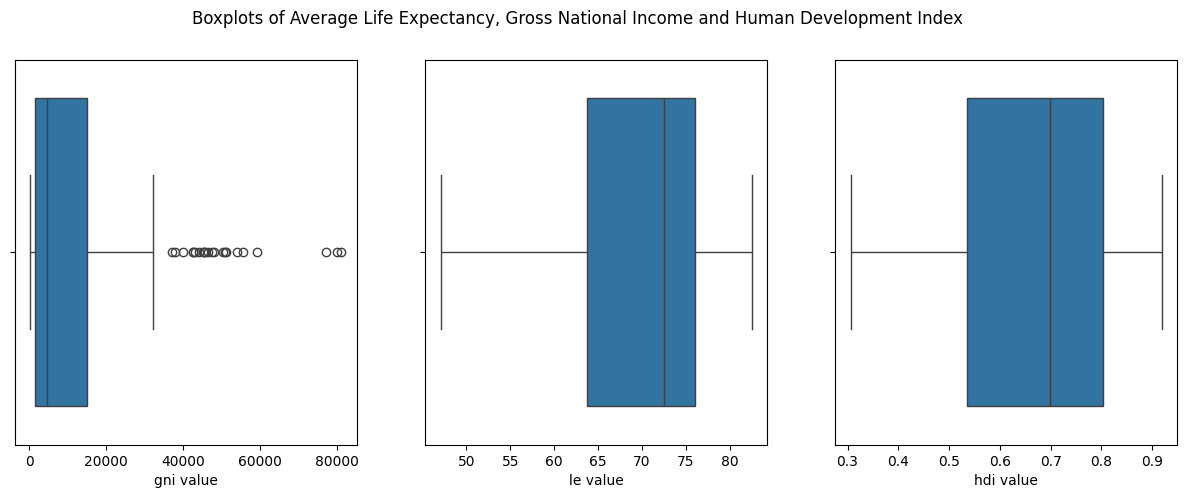

In [53]:
# Boxplots
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Boxplots of Average Life Expectancy, Gross National Income and Human Development Index")
for plot, column in zip(ax, ['gni','le','hdi']):
    sns.boxplot(data=avg_per_country, x=column, ax=plot)
    plot.set_xlabel(f"{column} value")
plt.show()

Large number of outliers in the GNI dataset, with no outliers in other datasets.

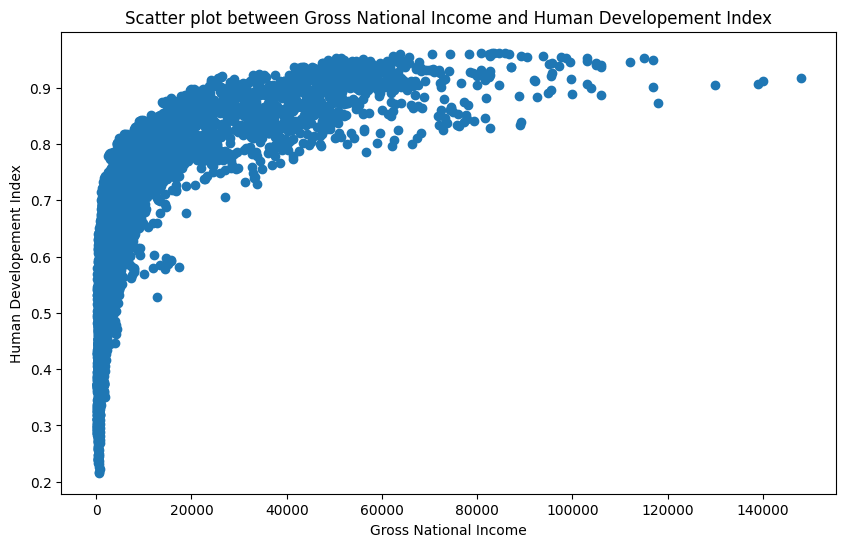

In [54]:
plt.figure(figsize=(10,6))
plt.title('Scatter plot between Gross National Income and Human Developement Index')
plt.scatter(n_merged[gni_columns], n_merged[hdi_columns])
plt.xlabel('Gross National Income')
plt.ylabel('Human Developement Index')
plt.show()

There seems to be an exponential increase in HDI when GNI increases till 25000, after which there is a more linear increase.

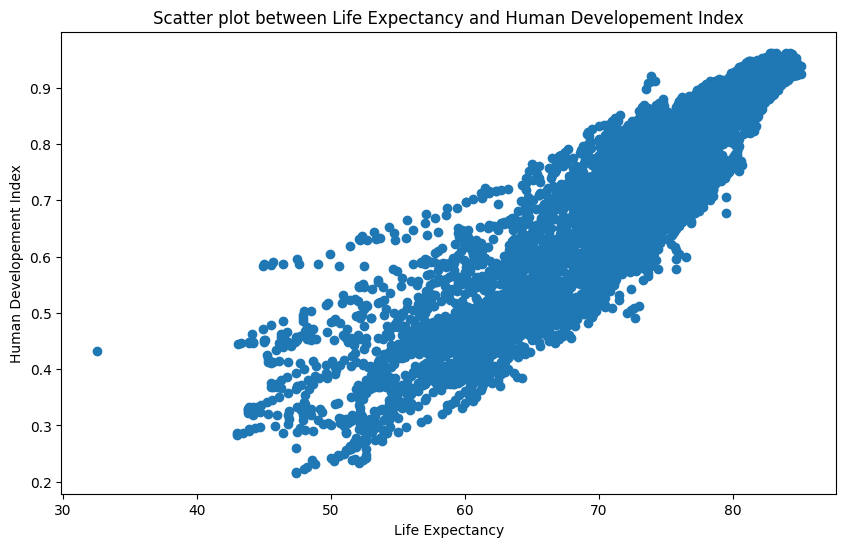

In [55]:
plt.figure(figsize=(10,6))
plt.title('Scatter plot between Life Expectancy and Human Developement Index')
plt.scatter(n_merged[le_columns], n_merged[hdi_columns])
plt.xlabel('Life Expectancy')
plt.ylabel('Human Developement Index')
plt.show()

There seems to be a linear relationship between Life Expectancy and HDI.

### Conclusions
From the analysis, we can draw the following conclusions:
- There is a positive correlation between Gross National Income and Human Developement Index.
- There is a positive correlation between Life Expectancy and Human Developement Index.
- Island countries like Fiji and Barbados did not have a wide range of life expectancy.
- Many African countries have a low Human Developement Index, supported by low levels of Life Expectancy and Gross National Income.
- European countries have a higher Human Developement Index, supported by high levels of Life Expectancy and Gross National Income.


### Recommendations
Based on the analysis, we can make the following recommendations:
- Focus on improving the HDI of African countries by positively influencing their Gross National Income and Life Expectancy.
- Include datasets that support the HDI apart from GNI and LE such as Population, Education, and Health.
- Conduct a deeper analysis of European countries to understand their HDI performance.